# Linear Regression

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called Multiple Linear Regression.

## Imports

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Importing Dataset

In [2]:
df = pd.read_csv('Dataset/MI.csv',sep=',')
df = df.drop("Result",axis=1)
df.reindex(np.random.permutation(df.index))	
df.head()

,Total,Rohit,Quinton,Surya,Ishan,Krunal,Pollard,Hardik
0,149,15,29,15,23,7,41,16
1,132,4,8,71,28,0,0,13
2,134,55,30,46,0,0,0,0
3,162,24,69,23,0,9,10,18
4,198,12,0,26,0,24,20,91


## Data Visualisation and Pre-processing

In [3]:
y = df['Total'].to_numpy()
df = df.drop("Total",axis=1)
X = df.to_numpy()

X.shape,y.shape

((30, 7), (30,))

### Feature Standardization

In [4]:
def StandardizeFeatures(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_Standardised = (X - mu) / sigma
    return X_Standardised

X = StandardizeFeatures(X)

## Linear Regression

**Parameters:**
- **W:** Weights of Model whoch includes Slope and Intercept of Line.
- $\lambda$: Regularisation Parameter
- **m:** No.of Training Instances
- **n:** No.of Features


**Cost-Function:**
\begin{align}
J(W) = \frac{1}{2m} \sum_{i=1}^m \left( x^{(i)}W - y^{(i)}\right)^2 +\frac{\lambda}{2m}\sum_{j=1}^n {W_j}^2
\end{align}

**Optimisation-Algorithm:** Gradient Descent

**Gradients:**
\begin{align}
W_j = W_j - \alpha \frac{\partial J(W)}{\partial W_j} \\
\frac{\partial J(W)}{\partial W_j} = \frac{1}{m}\sum_{i=1}^m \left( x^{(i)}W - y^{(i)}\right)x_j^{(i)} + \frac{\lambda}{m}W_j
\end{align}

**Note:**
- We add a column of ones to the given "X" which contributes for "Intercept" of Line.

In [5]:
class Regressor:
    def __init__(self):
        self.X = None
        self.y = None
        self.N = None
        self.M = None
        self.W = None
        self.Loss = None
        self._lambda = None
        self.lr = None

    def InitialiseWeights(self):
        self.W = np.random.rand(self.N,1)

    def ComputeCost(self):
        J = np.sum(np.square(np.dot(self.X, self.W) - self.y)) + self._lambda * np.sum(np.square(self.W))
        J = J/(2*self.M)
        return J

    def UpdateParameters(self):
        Grad = (np.dot(self.X.T, np.dot(self.X, self.W) - self.y) + self._lambda*self.W)/self.M
        self.W = self.W - (self.lr)*Grad

    def fit(self,X,y,Epochs,lr,_lambda=0.1):
        self._lambda = _lambda
        self.lr = lr

        self.M = X.shape[0]
        Bias = np.ones((self.M,1))
        self.X = np.append(X,Bias,axis=1)
        if len(y.shape) < 2:
            y = np.expand_dims(y,axis=-1)
        self.y = y
        self.N = self.X.shape[1]
        
        self.InitialiseWeights()
        self.Loss = []

        for e in range(Epochs):
            J = self.ComputeCost()
            print ("Epoch: %-*s  Loss: %s" % (6,e,J))
            self.Loss.append(J)
            self.UpdateParameters()

    def PlotLoss(self):
        plt.figure(figsize=(10,10))
        plt.style.use("dark_background")
        plt.plot(self.Loss,color="yellow")
        plt.grid()
        plt.title("Loss vs Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()
        

In [6]:
R = Regressor()
R.fit(X,y,15,0.9)

Epoch: 0       Loss: 14256.446386434063
Epoch: 1       Loss: 380.60613185426047
Epoch: 2       Loss: 209.69920264604463
Epoch: 3       Loss: 186.93830699916316
Epoch: 4       Loss: 174.30485753832312
Epoch: 5       Loss: 166.49402752732144
Epoch: 6       Loss: 161.53853957432864
Epoch: 7       Loss: 158.3564114036388
Epoch: 8       Loss: 156.29939504423433
Epoch: 9       Loss: 154.96375844196103
Epoch: 10      Loss: 154.09336706402593
Epoch: 11      Loss: 153.52420794892788
Epoch: 12      Loss: 153.1507080348136
Epoch: 13      Loss: 152.90467587146455
Epoch: 14      Loss: 152.74194317146822


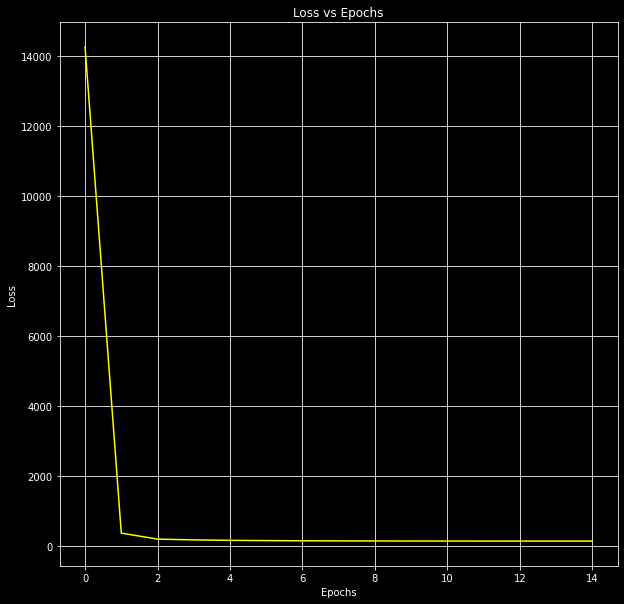

In [8]:
R.PlotLoss()